Load Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

Explore data

In [75]:
df= pd.read_csv('Australian Vehicle Prices.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
df.shape

(16734, 19)

Check nulls and clean data

In [4]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [5]:
df.UsedOrNew.unique()

array(['DEMO', 'USED', 'NEW', nan], dtype=object)

In [6]:
df.Doors.unique()

array([' 4 Doors', ' 5 Doors', ' 2 Doors', nan, ' 3 Doors', ' 7 Seats',
       ' 5 Seats', ' 4 Seats', ' 8 Seats', ' 2 Seats', ' 9 Seats',
       ' 6 Seats', ' 3 Seats', ' 12 Seats'], dtype=object)

In [7]:
df['Doors'] = df.Doors.str.replace(' Doors', '')

In [8]:
df['Doors'] = df.Doors.str.replace(' Seats', '')

In [9]:
df['Doors'] = df['Doors'].str.strip()

In [10]:
df.Doors.unique()

array(['4', '5', '2', nan, '3', '7', '8', '9', '6', '12'], dtype=object)

In [11]:
df['Doors'] = df['Doors'].fillna(df.Doors.median())

In [12]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                   0
Seats                1705
Price                   3
dtype: int64

In [13]:
df.Seats.unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', nan, ' 2 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats', ' 15 Seats'], dtype=object)

In [14]:
df['Seats'] = df.Seats.str.replace(' Seats', '')
df['Seats'] = df['Seats'].str.strip()

In [15]:
df['Seats'] = df['Seats'].fillna(df.Doors.median())

In [16]:
df.Seats.unique()

array(['7', '5', '4', 4.0, '2', '3', '14', '8', '6', '9', '11', '12',
       '22', '15'], dtype=object)

In [17]:
df.UsedOrNew.isnull().sum()

1

In [18]:
df.isnull().sum()

Brand                  1
Year                   1
Model                  1
Car/Suv               28
Title                  1
UsedOrNew              1
Transmission           1
Engine                 1
DriveType              1
FuelType               1
FuelConsumption        1
Kilometres             1
ColourExtInt           1
Location             450
CylindersinEngine      1
BodyType             282
Doors                  0
Seats                  0
Price                  3
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [21]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [22]:
df.CylindersinEngine.isnull().sum()

0

In [23]:
df['CylindersinEngine'] = df.CylindersinEngine.str.replace(' cyl', '')
df['CylindersinEngine'] = df['CylindersinEngine'].str.strip()
df['CylindersinEngine'] = df.CylindersinEngine.str.replace(' L', '')

In [24]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [25]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

col to change type -- 'Doors', 'Seats', 'Price', 'CylindersinEngine', 'Kilometres'

In [26]:
df.Doors.unique()
df['Doors'] = df.Doors.astype(int)

In [27]:
df.Seats.unique()
df['Seats'] = df.Seats.astype(int)

In [28]:
df.Price.unique()

array(['51990', '19990', '108988', ..., '21989', '36770', '35280'],
      dtype=object)

In [29]:
drop_rows = df['Price']=='POA'
df = df[~drop_rows]
df['Price'] = df.Price.astype(int)

In [30]:
df.CylindersinEngine.unique()

array(['4', '8', '-', '3', '6', '5', '12', '0', '2', '10'], dtype=object)

In [31]:
drop_rows = df['Price']=='POA'
df = df[~drop_rows]

In [32]:
df.shape

(15953, 19)

In [33]:
df.CylindersinEngine.unique()

array(['4', '8', '-', '3', '6', '5', '12', '0', '2', '10'], dtype=object)

In [34]:
df.Kilometres.unique()

array(['5595', '16', '8472', ..., '5165', '85525', '31852'], dtype=object)

In [35]:
df.CylindersinEngine.value_counts()

4     11182
6      1991
-      1379
8       585
5       399
3       308
0        91
12       11
2         4
10        3
Name: CylindersinEngine, dtype: int64

In [36]:
df['CylindersinEngine'] = df['CylindersinEngine'].str.replace('-','0')
df['CylindersinEngine'] = df['CylindersinEngine'].astype(int)

In [37]:
df.Kilometres.value_counts()

10       124
-        115
15        93
20        83
7         58
        ... 
13017      1
61781      1
4220       1
57409      1
31852      1
Name: Kilometres, Length: 14030, dtype: int64

In [38]:
df['Kilometres'] = df['Kilometres'].str.replace('-','0')
df['Kilometres'] = df['Kilometres'].astype(int)

In [39]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres             int32
ColourExtInt          object
Location              object
CylindersinEngine      int32
BodyType              object
Doors                  int32
Seats                  int32
Price                  int32
dtype: object

### Visualization


In [40]:
numerical_columns = df.select_dtypes(include=['int32', 'float64']).corr()
numerical_columns

,Year,Kilometres,CylindersinEngine,Doors,Seats,Price
Year,1.000000,-0.727665,-0.087030,0.101558,0.060472,0.354038
Kilometres,-0.727665,1.000000,0.104659,-0.118520,-0.002622,-0.397987
CylindersinEngine,-0.087030,0.104659,1.000000,-0.160570,0.237607,0.134578
Doors,0.101558,-0.118520,-0.160570,1.000000,0.319557,-0.109482
Seats,0.060472,-0.002622,0.237607,0.319557,1.000000,0.004619
Price,0.354038,-0.397987,0.134578,-0.109482,0.004619,1.000000


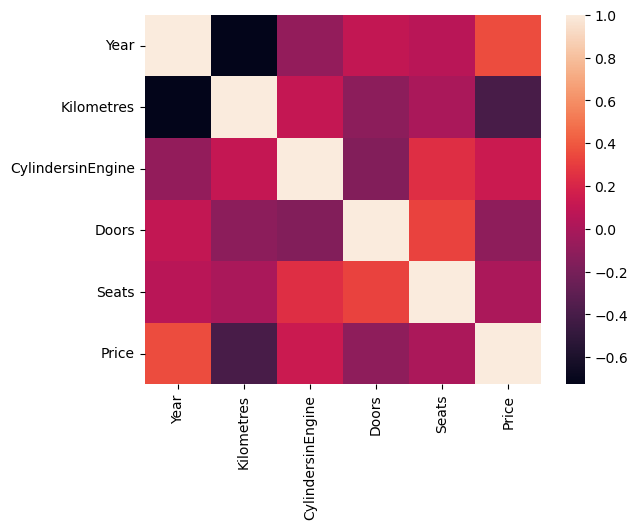

<Figure size 400x500 with 0 Axes>

In [41]:
sns.heatmap(numerical_columns)
plt.figure(figsize=(4,5))
plt.show()

In [42]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

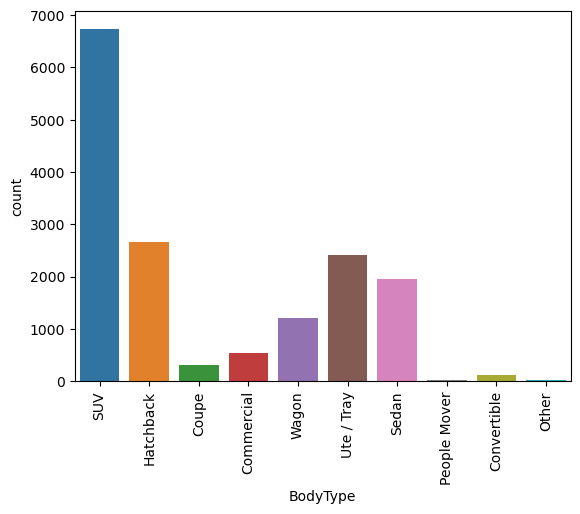

In [43]:
sns.countplot(x=df['BodyType'])
plt.xticks(rotation=90)
plt.show()

USED    14722
NEW       730
DEMO      501
Name: UsedOrNew, dtype: int64


<Axes: >

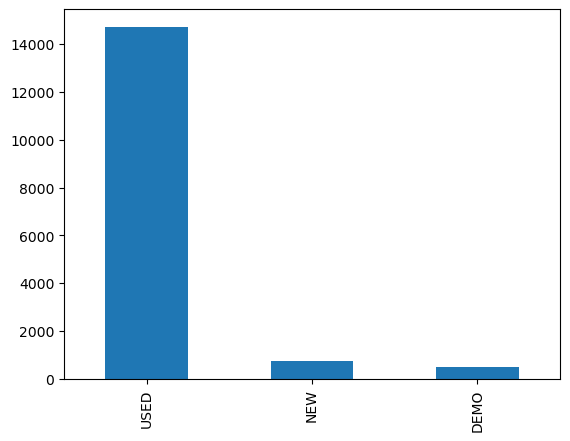

In [44]:
print(df.UsedOrNew.value_counts(ascending=False))
df.UsedOrNew.value_counts(ascending=False).plot(kind='bar')

<Axes: xlabel='DriveType', ylabel='count'>

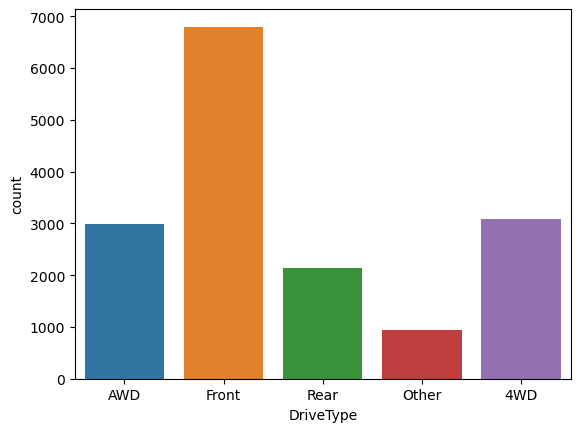

In [45]:
sns.countplot(x=df['DriveType'])

Toyota           2647
Hyundai          1201
Mazda            1132
Holden           1069
Ford             1037
Mitsubishi       1016
Nissan           1003
Volkswagen        862
Kia               792
Mercedes-Benz     582
Subaru            546
Audi              450
BMW               440
Honda             354
Jeep              318
Name: Brand, dtype: int64


<Axes: >

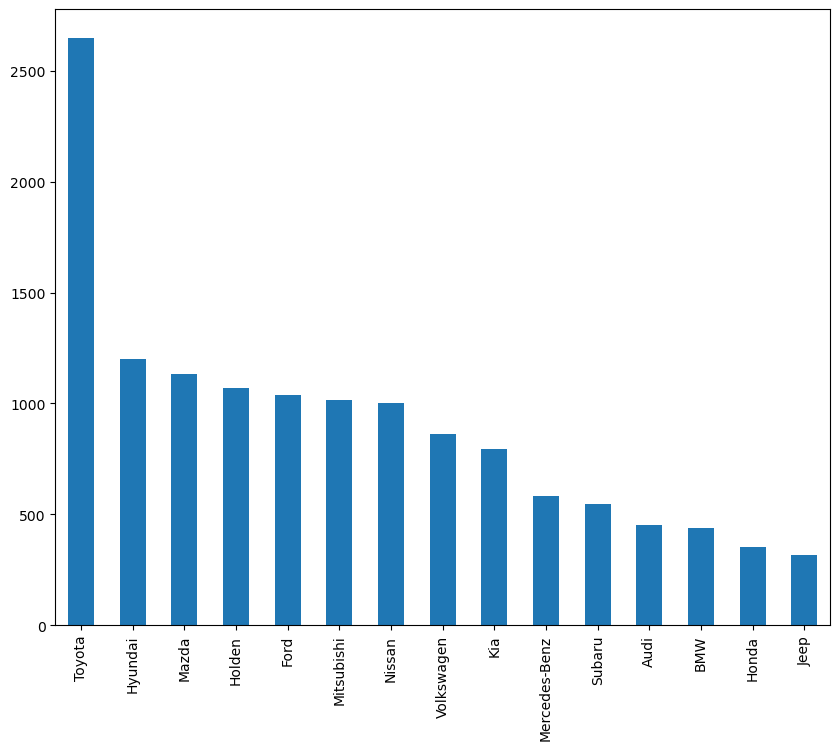

In [46]:
Top_brands = df.Brand.value_counts(ascending=False).head(15)
print(Top_brands)
df.Brand.value_counts().head(15).plot(kind='bar',figsize=(10,8))

In [47]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

<Axes: xlabel='Transmission', ylabel='Price'>

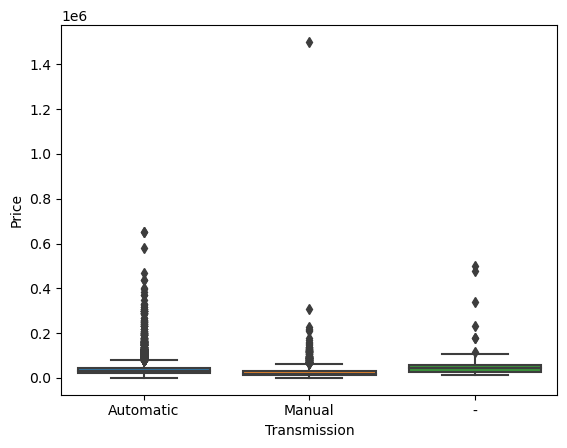

In [48]:
sns.boxplot(df, x='Transmission', y='Price', labels={'Price': 'Car Price'})

In [49]:
df.Transmission.unique()

array(['Automatic', 'Manual', '-'], dtype=object)

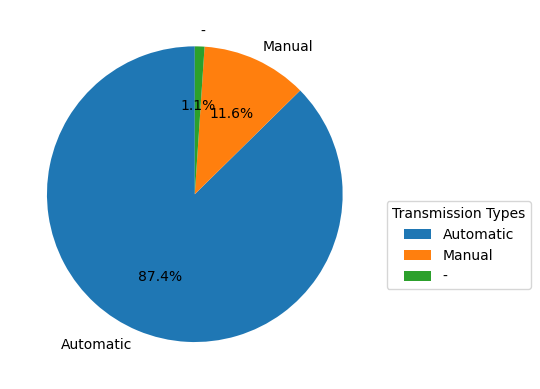

In [50]:
transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend(title="Transmission Types", loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

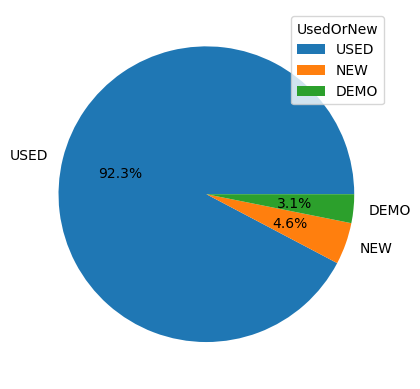

In [51]:
UsedOrNew_counts = df['UsedOrNew'].value_counts()
plt.pie(UsedOrNew_counts, labels=UsedOrNew_counts.index, autopct='%1.1f%%')
plt.legend(title="UsedOrNew", loc="upper right")
plt.show()

In [52]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4,SUV,4,7,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990


In [53]:
col_to_drop = ['ColourExtInt', 'Location', 'BodyType','Title']
df = df.drop(columns=col_to_drop, axis =1)

In [54]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
       'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'CylindersinEngine', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [55]:
dummies = pd.get_dummies(df)
dummies

,Year,Kilometres,CylindersinEngine,Doors,Seats,Price,Brand_Abarth,Brand_Alfa,Brand_Aston,Brand_Audi,...,FuelConsumption_9 L / 100 km,FuelConsumption_9.1 L / 100 km,FuelConsumption_9.2 L / 100 km,FuelConsumption_9.3 L / 100 km,FuelConsumption_9.4 L / 100 km,FuelConsumption_9.5 L / 100 km,FuelConsumption_9.6 L / 100 km,FuelConsumption_9.7 L / 100 km,FuelConsumption_9.8 L / 100 km,FuelConsumption_9.9 L / 100 km
0,2022.0,5595,4,4,7,51990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022.0,16,4,5,5,19990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022.0,8472,4,2,4,108988,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011.0,136517,8,2,4,32990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,1035,4,4,5,34990,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16728,2021.0,32977,4,4,5,36770,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16729,2014.0,66000,0,7,4,29500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16731,2022.0,5165,4,4,5,35280,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16732,2016.0,85525,4,4,5,41888,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'UsedOrNew', 'Transmission',
       'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres',
       'CylindersinEngine', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [57]:
x = dummies.drop('Price', axis=1)
y = dummies.Price

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = .8, random_state=10)

## Linear Regression Model

In [59]:
model = LinearRegression().fit(x_train, y_train)
model

LinearRegression()

In [60]:
model.score(x_train,y_train)

0.9210064294028689

In [61]:
model.score(x_test,y_test)

0.6809869684401297

## Lasso

In [62]:
las = Lasso(alpha=.4).fit(x_train, y_train)
las

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.023e+11, tolerance: 1.292e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.4)

In [63]:
las.score(x_train,y_train)

0.919203086176023

In [64]:
las.score(x_test,y_test)

0.7155388017049745

## Ridge

In [65]:
Ri = Ridge(alpha=1).fit(x_train, y_train)
Ri

Ridge(alpha=1)

In [66]:
Ri.score(x_train,y_train)

0.8816707407662205

In [67]:
Ri.score(x_test,y_test)

0.7306730023329064

In [68]:
y_pred = model.predict(x_test)
y_pred

array([12776.89760677, 18050.38316843, 41541.47525097, ...,
       22165.67116556, 24834.89855161, 64466.80957342])

In [69]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared= False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'the mse is : {mse}')
print(f'the rmse is : {rmse}')
print(f'the mae is : {mae}')
print(f'the r2 is : {r2}')

the mse is : 359231022.64874494
the rmse is : 18953.390795547508
the mae is : 7442.64860423444
the r2 is : 0.6809869684401297
